<h2>Intraday Stock Market Corrections during Recent Presidencies, an Analysis.</h2>
<br>
Author: Johann Zaroli

In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Markdown
import hashlib
from datetime import date
from scipy.stats import poisson
%matplotlib inline

<h3>Premise:</h3>  
This analysis takes into consideration intraday corrections larger than 2.71% during the three most recent presidencies (Trump 1, Biden, and Trump 2) to calculate the likelihood of corrections under each term and economic policies.  
<br>
<br>
Why 2.71%? The 10/10/25 S&P500 correction was the inspiration for this analysis. The data used is from investing.com. The 10/10 correction was recorded as 2.71% in their database. There was alleged insider trading that day fear across the media, and people losing lots of money from leverage.

<h3>Definitions:</h3>   

Intraday Correction: A S&P500 drop larger than 2.71% as calculated from the start of the trading session to its end (single day).  
<h3>Assumptions:</h3>  
It's assumed that all intraday corrections are independent of one another. As a result, the calculations in this exercise may have their limitations. Not all intraday corrections are fully independent and some are clustered into large, geopolitical events like Covid or the China Trade War. A good analogy is with earthquakes, as explained on the wikipedia page for the Poisson Distribution: "The number of magnitude 5 earthquakes per year in a country may not follow a Poisson distribution, if one large earthquake increases the probability of aftershocks of similar magnitude." A future iteration of this study would be wise to leverage either a mixed Poisson distribution or the compound Poisson process.

<h3>Data Important and Sanitization:</h3>   


In [2]:
historical = pd.read_csv('./data/SP500HistoricalData.csv')

# converts Date to datetime type:
historical["Date"] = pd.to_datetime(historical["Date"])

# converts Change % to float:
historical["Change %"] = (
    historical["Change %"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float)
)

# drops volume column:
historical.drop("Vol.", axis=1, inplace=True)

historical.head()
# historical.dtypes

,Date,Price,Open,High,Low,Change %
0,2025-10-14,"6,644.31","6,602.49","6,680.70","6,555.07",-0.16
1,2025-10-13,"6,654.72","6,622.53","6,668.68","6,620.71",1.56
2,2025-10-10,"6,552.51","6,740.49","6,762.40","6,550.78",-2.71
3,2025-10-09,"6,735.11","6,760.50","6,764.58","6,716.17",-0.28
4,2025-10-08,"6,753.72","6,723.87","6,755.64","6,718.09",0.58


<h2>Trump's First Term</h2>  

In [3]:
trump_1st_term = historical[(historical["Date"] <= "2021-01-19") & (historical["Change %"] <= -2.71)]
trump_1st_term

,Date,Price,Open,High,Low,Change %
1245,2020-10-28,"3,271.00","3,342.50","3,342.50","3,268.90",-3.53
1281,2020-09-08,"3,331.80","3,371.90","3,380.00","3,329.30",-2.78
1283,2020-09-03,"3,455.10","3,564.70","3,564.80","3,427.40",-3.51
1342,2020-06-11,"3,002.10","3,123.50","3,123.50","2,999.50",-5.89
1370,2020-05-01,"2,830.70","2,869.10","2,869.10","2,821.60",-2.81
1378,2020-04-21,"2,736.60","2,784.80","2,785.50","2,727.10",-3.07
1391,2020-04-01,"2,470.50","2,498.10","2,522.80","2,447.50",-4.41
1394,2020-03-27,"2,541.50","2,555.90","2,615.90","2,520.00",-3.37
1398,2020-03-23,"2,237.40","2,290.70","2,300.70","2,191.90",-2.93
1399,2020-03-20,"2,304.90","2,431.90","2,453.00","2,295.60",-4.34


<h4>General Analysis of Trump's First Term:</h4>  

In [4]:
# Number of days with drops:
trump_1st_term_days_drop = len(trump_1st_term)
print("1) There were", trump_1st_term_days_drop, "days with intraday drops equal or larger than -2.71% during Trump's first term.")

# Mean drop percentage
trump_1st_term_drop_mean = round(trump_1st_term["Change %"].mean(), 2)
print("2) The average drop during his first term was", trump_1st_term_drop_mean,"%")

# Standard deviation
trump_1st_term_std = round(trump_1st_term["Change %"].std(), 2)
print("3) The standard deviation during his first term was", trump_1st_term_std, "%")

1) There were 28 days with intraday drops equal or larger than -2.71% during Trump's first term.
2) The average drop during his first term was -4.25 %
3) The standard deviation during his first term was 2.16 %


<h4>Probability Analysis using Poisson's:</h4>

In [5]:
# lambda for Poisson's, using number of trading days during administration, number of events and 252 trading days per year
trump_1st_neg_events_year = round(((len(trump_1st_term) / 1007)) * 252, 2)
print(trump_1st_neg_events_year, "intraday stock market corrections per year on average during Trump's first term.")

7.01 intraday stock market corrections per year on average during Trump's first term.


<h4>Theoretical probability of larger than 2.71% intraday corrections under Trump's 1st term:</h4>

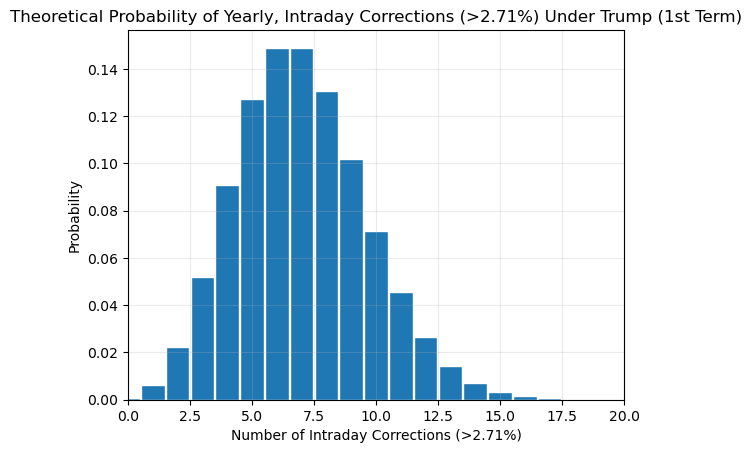

In [6]:
X = np.array(range(0, 20))
pmf = poisson.pmf(X, trump_1st_neg_events_year)

fig, ax = plt.subplots()

ax.bar(X, pmf, width=0.95, ec='white')
ax.grid(alpha=0.25)
ax.set_xlim([0,20])
ax.set_xlabel("Number of Intraday Corrections (>2.71%)")
ax.set_ylabel("Probability")
ax.set_title("Theoretical Probability of Yearly, Intraday Corrections (>2.71%) Under Trump (1st Term)")

plt.show()

<h2>Biden's Term</h2>  

In [7]:
biden_term = historical[(historical["Date"] >= "2021-01-20") & (historical["Date"] <= "2025-01-19") & (historical["Change %"] <= -2.71)]
biden_term

,Date,Price,Open,High,Low,Change %
204,2024-12-18,"5,872.16","6,047.65","6,070.67","5,867.79",-2.95
299,2024-08-05,"5,186.33","5,151.14","5,250.89","5,119.26",-3.00
756,2022-10-07,"3,639.66","3,706.74","3,706.74","3,620.73",-2.80
774,2022-09-13,"3,932.69","4,037.12","4,037.12","3,921.28",-4.32
785,2022-08-26,"4,057.66","4,198.74","4,203.04","4,057.66",-3.37
834,2022-06-16,"3,666.77","3,728.18","3,728.18","3,639.77",-3.25
837,2022-06-13,"3,749.63","3,838.15","3,838.15","3,734.30",-3.88
838,2022-06-10,"3,900.86","3,974.39","3,974.39","3,900.16",-2.91
854,2022-05-18,"3,923.68","4,051.98","4,051.98","3,911.91",-4.04
861,2022-05-09,"3,991.24","4,081.27","4,081.27","3,975.48",-3.20


<h4>General Analysis of Biden's Term:</h4>  

In [8]:
# Number of days with drops:
biden_term_days_drop = len(biden_term)
print("1) There were", biden_term_days_drop, "days with intraday drops equal or larger than -2.71% during Biden's term.")

# Mean drop percentage
biden_term_drop_mean = round(biden_term["Change %"].mean(), 2)
print("2) The average drop during Biden's term was", biden_term_drop_mean,"%")

# Standard deviation
biden_term_std = round(biden_term["Change %"].std(), 2)
print("3) The standard deviation during Biden's term was", biden_term_std, "%")

1) There were 15 days with intraday drops equal or larger than -2.71% during Biden's term.
2) The average drop during Biden's term was -3.3 %
3) The standard deviation during Biden's term was 0.49 %


<h4>Probability Analysis using Poisson's:</h4>

In [9]:
# lambda for Poisson's, using number of trading days during administration, number of events and 252 trading days per year
biden_term_neg_events_year = round(((len(biden_term) / 1007)) * 252, 2)
print(biden_term_neg_events_year, "intraday stock market corrections per year on average during Biden's term.")

3.75 intraday stock market corrections per year on average during Biden's term.


<h4>Theoretical probability of larger than 2.71% intraday corrections under Biden's term:</h4>

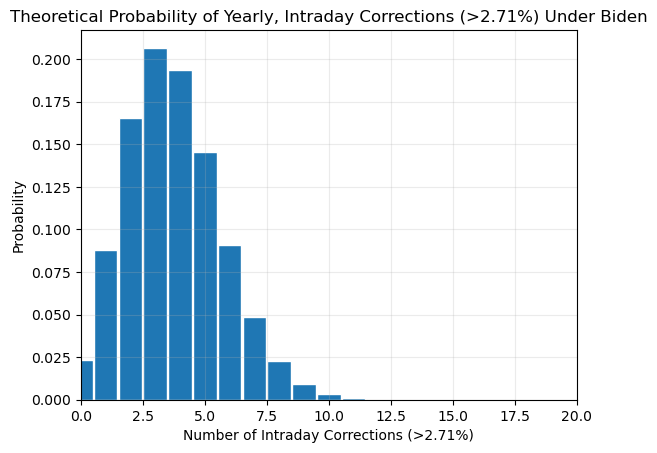

In [10]:
X = np.array(range(0, 20))
pmf = poisson.pmf(X, biden_term_neg_events_year)

fig, ax = plt.subplots()

ax.bar(X, pmf, width=0.95, ec='white')
ax.grid(alpha=0.25)
ax.set_xlim([0,20])
ax.set_xlabel("Number of Intraday Corrections (>2.71%)")
ax.set_ylabel("Probability")
ax.set_title("Theoretical Probability of Yearly, Intraday Corrections (>2.71%) Under Biden")

plt.show()

<h2>Trumps's Second Term</h2>

In [11]:
trump_2nd_term = historical[(historical["Date"] >= "2025-01-20") & (historical["Change %"] <= -2.71)]
trump_2nd_term

,Date,Price,Open,High,Low,Change %
2,2025-10-10,"6,552.51","6,740.49","6,762.40","6,550.78",-2.71
128,2025-04-10,"5,268.05","5,353.15","5,353.15","5,115.27",-3.46
132,2025-04-04,"5,074.08","5,292.14","5,292.14","5,069.90",-5.97
133,2025-04-03,"5,396.52","5,492.74","5,499.53","5,390.83",-4.84


<h4>General Analysis of Trump's Second Term:</h4>  

In [12]:
# Number of days with drops:
trump_2nd_term_days_drop = len(trump_2nd_term)
print("1) There have been", trump_2nd_term_days_drop, "days with intraday drops equal or larger than -2.71% during Trump's second term.")

# Mean drop percentage
trump_2nd_term_mean_drop = round(trump_2nd_term["Change %"].mean(), 2)
print("2) The average drop during his second term is", trump_2nd_term_mean_drop,"%")

# Standard deviation
trump_2nd_term_std = round(trump_2nd_term["Change %"].std(), 2)
print("3) The standard deviation during his second term is", trump_2nd_term_std, "%")

1) There have been 4 days with intraday drops equal or larger than -2.71% during Trump's second term.
2) The average drop during his second term is -4.24 %
3) The standard deviation during his second term is 1.45 %


<h4>Theoretical probability of larger than 2.71% intraday corrections under Trump's 2nd term:</h4>

In [13]:
# lambda for Poisson's, using number of trading days during administration, number of events and 252 trading days per year
trump_2nd_neg_events_year = round(((len(trump_2nd_term) / 195)) * 252, 2)
print(trump_2nd_neg_events_year, "intraday stock market corrections per year on average during Trump's second term.")

5.17 intraday stock market corrections per year on average during Trump's second term.


<h4>Theoretical probability of larger than 2.71% intraday corrections under Trumps's second term:</h4>

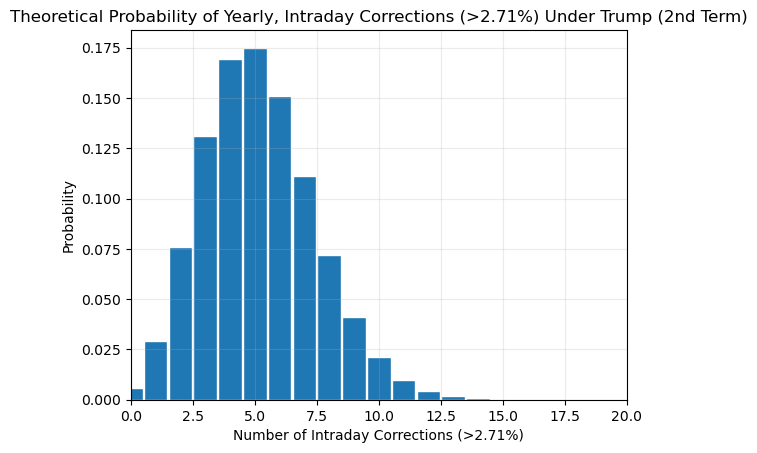

In [14]:
X = np.array(range(0, 20))
pmf = poisson.pmf(X, trump_2nd_neg_events_year)

fig, ax = plt.subplots()

ax.bar(X, pmf, width=0.95, ec='white')
ax.grid(alpha=0.25)
ax.set_xlim([0,20])
ax.set_xlabel("Number of Intraday Corrections (>2.71%)")
ax.set_ylabel("Probability")
ax.set_title("Theoretical Probability of Yearly, Intraday Corrections (>2.71%) Under Trump (2nd Term)")

plt.show()

<h2>Predictions for Trump's Second Term</h2>

<h4>What is the probability of at least one correction in the next year?</h4>

In [15]:
at_least_one = round(1 - math.e**(-trump_2nd_neg_events_year), 4)
at_least_one

0.9943

<h4>What is the probability of a correction in the next month? assuming 22 trading days per month</h4>

In [16]:
twentytwo_day_lambda = trump_2nd_neg_events_year * (22/252)
one_next_thirty_days = round(math.e**(-twentytwo_day_lambda) * ((twentytwo_day_lambda**1) / special.factorial(1)), 4).item()
one_next_thirty_days

0.2874

<h4>What is the probability of at least one correction in the next 30 days?</h4>

In [17]:
at_least_one_next_month = round(1 - math.e**(-twentytwo_day_lambda), 4)
at_least_one_next_month

0.3632

<h4>What is the probability of at least two corrections in the next 30 days?</h4>

In [18]:
at_least_two_next_month = round(1 - math.e**(-twentytwo_day_lambda) * (1 + twentytwo_day_lambda), 4)
at_least_two_next_month

0.0758

<h4>What is the probability of at least three corrections in the next 30 days?</h4>

In [19]:
at_least_three_next_month = round(1 - math.e**(-twentytwo_day_lambda) * (
                                    1 + twentytwo_day_lambda + (twentytwo_day_lambda**2) / 2)
                            , 4)
at_least_three_next_month

0.011

<h4>Probability of having more than 5 intraday corrections (>2.71%) per year?</h4>

In [24]:
print(round(sum(pmf[5:]), 2))

0.59
